In [35]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-payment-intentions-preprocessed/df_copy - with platform columns (shortened column names).csv
/kaggle/input/online-payment-intentions-preprocessed/df_copy - without platform columns.csv
/kaggle/input/online-payment-intentions-preprocessed/df_copy - with platform columns.csv
/kaggle/input/online-payment-intentions/In22-CS3121-Project Dataset.xlsx


In [36]:
df_copy = pd.read_csv("/kaggle/input/online-payment-intentions-preprocessed/df_copy - with platform columns (shortened column names).csv")

In [37]:
df_copy2 = df_copy.copy()

# EDA

In [38]:
df_copy2 = df_copy2.drop(['platforms_list', 'specialty_platform_list', 'pharmacy_list', 'retailer_list', 'grocery_delivery_list'], axis=1)

In [39]:
column_info = pd.DataFrame({
    "Column Name": df_copy2.columns,
    "Data Type": df_copy2.dtypes.values
})
pd.set_option('display.max_rows', None) 
print(column_info)

                                           Column Name Data Type
0                                           Unnamed: 0     int64
1                                               gender     int64
2                                                  age     int64
3                           highest level of education     int64
4                                       marital status     int64
5           have used online shopping platforms before     int64
6                              professional background     int64
7                         general e-commerce platforms    object
8                 specialty online stores / automobile    object
9                                    online pharmacies    object
10                        fashion and beauty retailers    object
11                           grocery delivery services    object
12   it is easy to navigate through the online plat...     int64
13   the online platform provides clear and intuiti...     int64
14   it was easy for me t

In [40]:
column_info.to_excel("column_info.xlsx", index=False)

In [41]:
binary_features = [
    'have used online shopping platforms before', 'have you made online purchases during crisis time?',
    'ali-express', 'daraz', 'ebay', 'ikman', 'instagram stores', 'kapruka', 'keels', 
    'lassana.com', 'pickme', 'shein', 'strong.lk', 'takas', 'wishque', 'wow',
    'amazon', 'autolanka.com', 'ikman.lk', 'lankavechicle.com', 'patpat.lk', 'pricelanka.lk', 
    'riyasewana.lk', 'specialty online stores / automobile unknown', 'toyota',
    'zero specialty online stores / automobile', 'ceymed.lk', 'epharma.lk', 
    'healthgurd.lk', 'healthnet.lk', 'nearby pharmacy', 'no online pharmacies', 
    'online pharmacy unknown', 'onlinepharmacy.lk', 'union chemist', 'amanthe', 
    'carlo clothing', 'carnage,', 'chenara dodge', 'dsi', 'fashionbug.lk', 'gflock',
    'kapruka.com/fashion', 'kelly felder', 'kynd fashion', 'midnightdivas.com', 'mimosa', 'moods',
    'moose', 'nills', 'no fashion and beauty retailers', 'nolimit.lk', 'noorareed.lk', 'odel.lk',
    's&s', 'spring and summer', 'tharshana and insta shops', 'thilakawardana.lk', 
    'unknown fashion and beauty retailers', 'zigzag.lk', 'arpico.lk', 
    'cargillsonline.com', 'cinnamonhotel.com', 'glomark.lk', 'grocery delivery services not used', 
    'keellssuper.lk', 'pickmefoods.com', 'ubereats.com', 'unknown grocery delivery services'
]

platform_groups = [
    'general e-commerce platforms', 'specialty online stores / automobile', 'online pharmacies', 
    'fashion and beauty retailers', 'grocery delivery services'
]

other_features = [
    'it is easy to navigate through the online platform to find the products or services i need',
    'the online platform provides clear and intuitive navigation options',
    'it was easy for me to learn how to use the online platform for making online purchases',
    'i quickly became proficient in using the online platform for making online purchases during a crisis',
    'the instructions provided on the online platform are clear and easy to understand',
    'i can easily follow the instructions given on the online platform for making online purchases',
    'the online platform responds quickly to my actions, such as loading pages and processing transactions.',
    'i don\'t experience delays or long waiting times when using the online platform for making online purchases during a crisis',
    'the online platform effectively handles errors or mistakes, such as providing clear error messages and easy recovery options',
    'i rarely encounter errors or issues when using the online platform for making online purchases during a crisis',
    'the online platform offers a wide range of products and services that meet my needs during a crisis',
    'i can find the products or services i need on the online platform during a crisis',
    'using the online platform for making purchases during a crisis is convenient and saves time',
    'the online platform makes it easy to search for products and complete transactions during a crisis',
    'the online platform offers competitive prices, discounts, or cost-saving benefits during a crisis',
    'i perceive that using the online platform for making purchases during a crisis can help me save money',
    'the online platform provides detailed and accurate product information during a crisis',
    'i can easily access user reviews, ratings, and other relevant information to support my purchase decisions',
    'the online platform tailors recommendations, suggestions, or personalized offers based on my preferences',
    'i feel that the online platform understands my needs and preferences during a crisis',
    'the online platform takes appropriate measures to protect my privacy',
    'i trust that my personal information will be handled securely by the online platform',
    'the online platform provides secure payment methods to protect against fraudulent activities during a crisis',
    'i trust that my payment details are handled securely by the online platform',
    'the online platform provides clear and easily accessible policies regarding data handling, privacy, and security',
    'i feel confident in the online platform\'s transparency regarding its data protection practices',
    'i am influenced by recommendations and opinions from family and friends when making online purchases during a crisis',
    'i consider the experiences and suggestions shared by people i know before making online purchases during a crisis',
    'during a crisis, social media platforms, influencers, and online communities influence my online purchase decisions',
    'i am likely to make online purchases during a crisis based on what i see or learn from social media platforms',
    'i consider online reviews and ratings when making purchasing decisions during a crisis',
    'positive reviews and high ratings increase my confidence in making online purchases during a crisis',
    'observing others making online purchases during a crisis influences my own intention to make similar purchases',
    'i am more likely to make online purchases during a crisis if i see others doing the same',
    'social norms and expectations regarding online shopping during a crisis influence my own intention to make online purchases',
    'i feel pressure to make online purchases during a crisis due to the expectations of others',
    'i am willing to share my own online shopping experiences, recommendations, or opinions with others during a crisis',
    'sharing information about my online purchases during a crisis is important for influencing others\' purchase decisions',
    'overall, i have a positive attitude toward online shopping during a crisis',
    'i believe that online shopping is a practical and efficient way to make purchases during a crisis',
    'i am concerned about the security of my personal and financial information when shopping online during a crisis',
    'i am cautious about the reliability and authenticity of products or services offered by online platforms during a crisis',
    'overall, i am satisfied with online purchase during a crisis?',
    'i have changed my online shopping behavior during a crisis compared to non-crisis periods?',
    'it was convenient for me to do online shopping during a crisis compared to traditional in-store shopping',
    'i believe that online shopping during a crisis offers better value for money compared to traditional shopping methods'
]

In [42]:
for platform_group in platform_groups:
    unique_values = df_copy2[platform_group].unique()
    print("Unique values of", platform_group, ":\n", unique_values, "\n")

Unique values of general e-commerce platforms :
 ['daraz, ikman' 'daraz, kapruka, ikman' 'daraz, wow' 'daraz, kapruka'
 'kapruka, ikman, takas, wishque' 'daraz, kapruka, ikman, takas, wow'
 'kapruka, ali-express' 'daraz' 'daraz, kapruka, ikman, wishque'
 'daraz, ikman, wow' 'ikman' 'kapruka' 'daraz, ali-express'
 'daraz, strong.lk' 'ali-express, ebay' 'kapruka, ikman' 'daraz, keels'
 'daraz, ikman, takas, wow' 'daraz, keels, wishque'
 'daraz, kapruka, ikman, amazon ,ebay' 'kapruka, ikman, takas, wow'
 'kapruka, ikman, takas' 'daraz, kapruka, ikman, takas'
 'daraz, kapruka, pickme' 'daraz, kapruka, wow' 'ebay' 'daraz, wishque'
 'daraz, kapruka, lassana.com' 'daraz, takas, wow'
 'daraz, kapruka, ikman, wow' 'daraz, ikman, takas'
 'daraz, instagram stores' 'shein'] 

Unique values of specialty online stores / automobile :
 ['specialty online stores / automobile unknown' 'patpat.lk'
 'patpat.lk, riyasewana.lk' 'lankavechicle.com' 'riyasewana.lk'
 'autolanka.com' 'autolanka.com, riyasewana.

# Gender

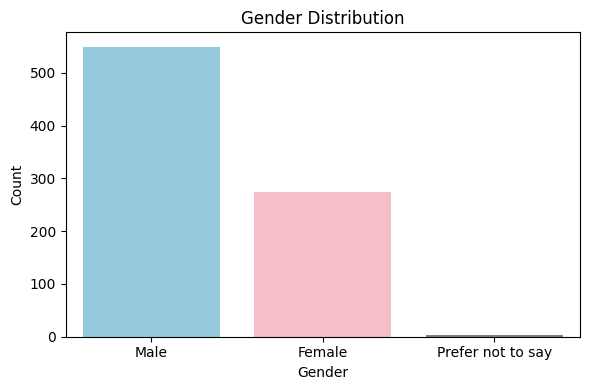

In [43]:
gender_map = {0: 'Male', 1: 'Female', -1: 'Prefer not to say'}
df_copy2['gender_label'] = df_copy2['gender'].map(gender_map)

# Countplot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df_copy2, x='gender_label', palette=['skyblue', 'lightpink', 'gray'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Association

In [8]:
output_dir = '/kaggle/working/gender'
os.makedirs(output_dir, exist_ok=True)

In [9]:
output_dir = '/kaggle/working/gender/association'
os.makedirs(output_dir, exist_ok=True)

In [14]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import os
# import re
# import warnings
# import shutil
# import zipfile

# warnings.filterwarnings('ignore')

# def sanitize_filename(name):
#     return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# # Define the platform groups and their corresponding columns
# platform_groups = {
#     'General E-commerce Platforms': [
#         'daraz', 'ikman', 'ikman.lk', 'kapruka', 'wow', 'takas', 'wishque', 'ali-express',
#         'strong.lk', 'ebay', 'keels', 'pickme', 'lassana.com', 'instagram stores', 'shein'
#     ],
#     'Specialty Online Stores / Automobile': [
#         'specialty online stores / automobile unknown', 'patpat.lk', 'riyasewana.lk', 'lankavechicle.com',
#         'autolanka.com', 'pricelanka.lk', 'toyota', 'zero specialty online stores / automobile', 'amazon'
#     ],
#     'Online Pharmacies': [
#         'online pharmacy unknown', 'epharma.lk', 'onlinepharmacy.lk', 'healthgurd.lk', 'ceymed.lk',
#         'union chemist', 'healthnet.lk', 'no online pharmacies', 'nearby pharmacy'
#     ],
#     'Fashion and Beauty Retailers': [
#         'unknown fashion and beauty retailers', 'kapruka.com/fashion', 'fashionbug.lk', 'odel.lk',
#         'thilakawardana.lk', 'noorareed.lk', 'midnightdivas.com', 'kelly felder', 'zigzag.lk', 'moose',
#         'chenara dodge', 'dsi', 'no fashion and beauty retailers', 'nills', 'spring and summer',
#         'nolimit.lk', 'gflock', 'moods', 'amanthe', 's&s', 'carlo clothing', 'tharshana and insta shops',
#         'kynd fashion', 'carnage,', 'mimosa'
#     ],
#     'Grocery Delivery Services': [
#         'ubereats.com', 'pickmefoods.com', 'keellssuper.lk', 'arpico.lk', 'unknown grocery delivery services',
#         'glomark.lk', 'cinnamonhotel.com', 'cargillsonline.com', 'grocery delivery services not used'
#     ]
# }

# # Create a working copy of df_copy2 to add group usage columns
# df_working = df_copy2.copy()

# # Dictionary to store contingency tables for each group
# platform_contingency_tables = {}

# # Process each platform group
# for group_name, platforms in platform_groups.items():
#     # Filter platforms that exist in df_copy2
#     valid_platforms = [platform for platform in platforms if platform in df_copy2.columns]
#     if not valid_platforms:
#         print(f"No valid platforms found for group '{group_name}'. Skipping...")
#         continue

#     if len(valid_platforms) != len(platforms):
#         missing_platforms = [platform for platform in platforms if platform not in df_copy2.columns]
#         print(f"Missing platforms in group '{group_name}': {missing_platforms}")

#     try:
#         # Create a binary column for the group: 1 if any platform is used, 0 otherwise
#         group_usage_column = f"{group_name} Usage"
#         df_working[group_usage_column] = df_working[valid_platforms].max(axis=1).astype(int)

#         # Create contingency table (do not print)
#         contingency_table = pd.crosstab(df_working['gender_label'], df_working[group_usage_column])

#         # Add group name as a column and store
#         contingency_table_reset = contingency_table.reset_index()
#         contingency_table_reset['Group'] = group_name
#         platform_contingency_tables[group_name] = contingency_table_reset

#         # Visualize using stacked bar plot
#         plt.figure(figsize=(8, 6))
#         sns.countplot(data=df_working, x='gender_label', hue=group_usage_column, palette='Set2')
#         plt.title(f'Gender vs. {group_name} Usage')
#         plt.xlabel('Gender')
#         plt.ylabel('Count')
#         plt.legend(['Not Used', 'Used'])
#         plt.tight_layout()
#         filename = f"{output_dir}/gender_vs_{sanitize_filename(group_name)}_usage_stacked_bar.png"
#         plt.savefig(filename)
#         plt.close()
#         print(f"Saved plot: {filename}")
#     except Exception as e:
#         print(f"Failed to process group '{group_name}': {e}")
#         plt.close()
#         continue

# # Save all platform contingency tables to a single XLSX file with separate sheets
# output_xlsx = '/kaggle/working/gender/platform_contingency_tables.xlsx'
# with pd.ExcelWriter(output_xlsx, engine='openpyxl') as writer:
#     for group_name, contingency_table in platform_contingency_tables.items():
#         # Reorder columns to have 'Group' first
#         cols = ['Group'] + [col for col in contingency_table.columns if col != 'Group']
#         contingency_table = contingency_table[cols]
#         # Write to a separate sheet
#         sheet_name = sanitize_filename(group_name)[:31]  # Excel sheet names must be <= 31 characters
#         contingency_table.to_excel(writer, sheet_name=sheet_name, index=False)
#         print(f"Saved contingency table for {group_name} to sheet '{sheet_name}' in: {output_xlsx}")

# # Create a ZIP file containing all the plots
# zip_filename = '/kaggle/working/gender/plots_grouped.zip'
# print(f"Creating ZIP file: {zip_filename}...")

# with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(output_dir):
#         for file in files:
#             if file.endswith('.png'):  # Only include PNG files
#                 file_path = os.path.join(root, file)
#                 # Add the file to the ZIP, preserving the relative path
#                 arcname = os.path.relpath(file_path, '/kaggle/working/')
#                 zipf.write(file_path, arcname)
#                 print(f"Added {file_path} to ZIP as {arcname}")

# print(f"ZIP file created: {zip_filename}")

# print("EDA (Association) for platform groups as a whole completed. Plots saved as PNG files in /kaggle/working/plots/ and bundled into /kaggle/working/plots.zip")

Missing platforms in group 'General E-commerce Platforms': ['amazon_ecommerce']
Saved plot: /kaggle/working/gender/plots_grouped/gender_vs_General_E-commerce_Platforms_usage_stacked_bar.png
Missing platforms in group 'Specialty Online Stores / Automobile': ['amazon_automotive']
Saved plot: /kaggle/working/gender/plots_grouped/gender_vs_Specialty_Online_Stores___Automobile_usage_stacked_bar.png
Saved plot: /kaggle/working/gender/plots_grouped/gender_vs_Online_Pharmacies_usage_stacked_bar.png
Saved plot: /kaggle/working/gender/plots_grouped/gender_vs_Fashion_and_Beauty_Retailers_usage_stacked_bar.png
Saved plot: /kaggle/working/gender/plots_grouped/gender_vs_Grocery_Delivery_Services_usage_stacked_bar.png
Saved contingency table for General E-commerce Platforms to sheet 'General_E-commerce_Platforms' in: /kaggle/working/gender/platform_contingency_tables.xlsx
Saved contingency table for Specialty Online Stores / Automobile to sheet 'Specialty_Online_Stores___Autom' in: /kaggle/working/ge

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
import zipfile

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/gender/association/plots-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# Mapping for other_features values (1 to 5)
agreement_mapping = {
    0: 'Strongly Disagree',
    1: 'Disagree',
    2: 'Neutral',
    3: 'Agree',
    4: 'Strongly Agree'
}

# Define the correct order of agreement levels
agreement_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Association: Gender vs. Binary Features (Contingency Tables + Stacked Bar Plots)
binary_contingency_tables = []  

for feature in binary_features:
    try:
        # Create contingency table
        contingency_table = pd.crosstab(df_copy2['gender_label'], df_copy2[feature])
        print(f"Contingency Table for {feature} created")

        # Add feature name as a column and append to list
        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature
        binary_contingency_tables.append(contingency_table_reset)

        # Visualize using stacked bar plot
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_copy2, x='gender_label', hue=feature, palette='Set2')
        plt.title(f'Gender vs. {feature} Usage')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.legend(['Not Used', 'Used'])
        plt.tight_layout()
        filename = f"{output_dir}/gender_vs_{sanitize_filename(feature)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {feature}: {e}")
        plt.close()
        continue

# Save Binary Features Contingency Tables to a Spreadsheet
if binary_contingency_tables:
    all_binary_tables_df = pd.concat(binary_contingency_tables, ignore_index=True)
    cols = ['Feature'] + [col for col in all_binary_tables_df.columns if col != 'Feature']
    all_binary_tables_df = all_binary_tables_df[cols]
    output_xlsx = '/kaggle/working/gender/association/binary_contingency_tables.xlsx'
    all_binary_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved binary contingency tables to: {output_xlsx}")
else:
    print("No binary contingency tables to save.")

# Association: Gender vs. Other Features (Contingency Tables + Stacked Bar Plots)
other_contingency_tables = []  

df_copy2_mapped = df_copy2.copy()
for feature in other_features:
    df_copy2_mapped[feature] = df_copy2_mapped[feature].map(agreement_mapping)
    # Convert to categorical type with specified order
    df_copy2_mapped[feature] = pd.Categorical(df_copy2_mapped[feature], categories=agreement_order, ordered=True)

for feature in other_features:
    try:
        contingency_table = pd.crosstab(df_copy2['gender_label'], df_copy2_mapped[feature])
        print(f"Contingency Table for {feature} created")
        
        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature
        other_contingency_tables.append(contingency_table_reset)

        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_copy2_mapped, x='gender_label', hue=feature, hue_order=agreement_order, palette='Set3')
        plt.title(f'Gender vs. {feature} Agreement Levels')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.legend(title='Agreement Level')
        plt.tight_layout()
        filename = f"{output_dir}/gender_vs_{sanitize_filename(feature)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {feature}: {e}")
        plt.close()
        continue

if other_contingency_tables:
    all_other_tables_df = pd.concat(other_contingency_tables, ignore_index=True)
    cols = ['Feature'] + [col for col in all_other_tables_df.columns if col != 'Feature']
    all_other_tables_df = all_other_tables_df[cols]
    output_xlsx = '/kaggle/working/gender/association/other_contingency_tables.xlsx'
    all_other_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved other features contingency tables to: {output_xlsx}")
else:
    print("No other features contingency tables to save.")

# Create a ZIP file containing all the plots
zip_filename = '/kaggle/working/gender/association/plots-association.zip'
print(f"Creating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):  
                file_path = os.path.join(root, file)
                
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file created: {zip_filename}")

print("EDA (Association) completed. Plots saved as PNG files")

Contingency Table for have used online shopping platforms before created
Saved plot: /kaggle/working/gender/association/plots-association/gender_vs_have_used_online_shopping_platforms_before_stacked_bar.png
Contingency Table for have you made online purchases during crisis time? created
Saved plot: /kaggle/working/gender/association/plots-association/gender_vs_have_you_made_online_purchases_during_crisis_time__stacked_bar.png
Contingency Table for ali-express created
Saved plot: /kaggle/working/gender/association/plots-association/gender_vs_ali-express_stacked_bar.png
Contingency Table for daraz created
Saved plot: /kaggle/working/gender/association/plots-association/gender_vs_daraz_stacked_bar.png
Contingency Table for ebay created
Saved plot: /kaggle/working/gender/association/plots-association/gender_vs_ebay_stacked_bar.png
Contingency Table for ikman created
Saved plot: /kaggle/working/gender/association/plots-association/gender_vs_ikman_stacked_bar.png
Contingency Table for instag

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
import shutil
import zipfile

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/gender/association/plots_grouped_platforms-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# Define the "not used" values for each group. Unknown is not grouped as "not used"
not_used_values = {
    'general e-commerce platforms': None,  # No explicit "not used" value
    'specialty online stores / automobile': ['zero specialty online stores / automobile'],
    'online pharmacies': ['no online pharmacies'],
    'fashion and beauty retailers': ['no fashion and beauty retailers'],
    'grocery delivery services': ['grocery delivery services not used']
}

# Define the "unknown" values for each group
unknown_values = {
    'general e-commerce platforms': ['unknown'],  # Check for empty-like strings
    'specialty online stores / automobile': ['specialty online stores / automobile unknown'],
    'online pharmacies': ['online pharmacy unknown'],
    'fashion and beauty retailers': ['unknown fashion and beauty retailers'],
    'grocery delivery services': ['unknown grocery delivery services']
}

df_working = df_copy2.copy()

platform_contingency_tables = {}

# Process each platform group
for group in platform_groups:
    if group not in df_working.columns:
        print(f"Column '{group}' not found in df_copy2. Skipping...")
        continue

    try:
        # 0 (Not Used), 1 (Used), 2 (Unknown)
        group_usage_column = f"{group} Usage"
        not_used = not_used_values.get(group, [])
        unknown = unknown_values.get(group, [])
        
        # Convert not_used and unknown lists to lowercase for comparison
        not_used_lower = [val.lower() for val in not_used] if not_used else []
        unknown_lower = [val.lower() for val in unknown] if unknown else []

        # If no explicit "not used" value, assume empty-like strings mean not used
        if not_used is None:
            df_working[group_usage_column] = df_working[group].apply(
                lambda x: 0 if pd.isna(x) or str(x).strip().lower() == '' else
                         2 if str(x).strip().lower() in unknown_lower else 1
            )
        else:
            df_working[group_usage_column] = df_working[group].apply(
                lambda x: 0 if pd.isna(x) or str(x).strip().lower() in not_used_lower else
                         2 if str(x).strip().lower() in unknown_lower else 1
            )

        # For debugging
        # print(f"\nValue counts for {group_usage_column}:\n", df_working[group_usage_column].value_counts())

        # Create contingency table and print it
        contingency_table = pd.crosstab(df_working['gender_label'], df_working[group_usage_column])
        print(f"\nContingency Table for {group} created")

        # Add group name as a column and store
        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Group'] = group
        platform_contingency_tables[group] = contingency_table_reset

        # Visualize using stacked bar plot with explicit hue_order
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_working, x='gender_label', hue=group_usage_column, hue_order=[0, 1, 2], palette='Set2')
        plt.title(f'Gender vs. {group} Usage')
        plt.xlabel('Gender')
        plt.ylabel('Count')
        plt.legend(['Not Used', 'Used', 'Unknown'])
        plt.tight_layout()
        filename = f"{output_dir}/gender_vs_{sanitize_filename(group)}_usage_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
        
    except Exception as e:
        print(f"Failed to process group '{group}': {e}")
        plt.close()
        continue

# Save all contingency tables to a single XLSX file with separate sheets
output_xlsx = '/kaggle/working/gender/association/platform_contingency_tables.xlsx'
with pd.ExcelWriter(output_xlsx, engine='openpyxl') as writer:
    for group_name, contingency_table in platform_contingency_tables.items():
        cols = ['Group'] + [col for col in contingency_table.columns if col != 'Group']
        contingency_table = contingency_table[cols]
        sheet_name = sanitize_filename(group_name)[:31]  # Excel sheet names must be <= 31 characters
        contingency_table.to_excel(writer, sheet_name=sheet_name, index=False)
        print(f"Saved contingency table for {group_name} to sheet '{sheet_name}' in: {output_xlsx}")

# Create a ZIP file 
zip_filename = '/kaggle/working/gender/association/plots_grouped_platforms-association.zip'
print(f"Creating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):  # Only include PNG files
                file_path = os.path.join(root, file)
                # Add the file to the ZIP, preserving the relative path
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file created: {zip_filename}")

print("EDA (Association) for platform groups completed. Plots saved as PNG files in /kaggle/working/gender/association/plots_grouped_platforms-association and bundled into /kaggle/working/gender/association/plots_grouped_platforms-association.zip")


Contingency Table for general e-commerce platforms created
Saved plot: /kaggle/working/gender/association/plots_grouped_platforms-association/gender_vs_general_e-commerce_platforms_usage_stacked_bar.png

Contingency Table for specialty online stores / automobile created
Saved plot: /kaggle/working/gender/association/plots_grouped_platforms-association/gender_vs_specialty_online_stores___automobile_usage_stacked_bar.png

Contingency Table for online pharmacies created
Saved plot: /kaggle/working/gender/association/plots_grouped_platforms-association/gender_vs_online_pharmacies_usage_stacked_bar.png

Contingency Table for fashion and beauty retailers created
Saved plot: /kaggle/working/gender/association/plots_grouped_platforms-association/gender_vs_fashion_and_beauty_retailers_usage_stacked_bar.png

Contingency Table for grocery delivery services created
Saved plot: /kaggle/working/gender/association/plots_grouped_platforms-association/gender_vs_grocery_delivery_services_usage_stacked_

## Correlation

In [ ]:
# Without multiple testing adjusted

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
import shutil
import zipfile
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# Function to perform chi-squared test and return p-value
def chi_square_test(contingency_table):
    if contingency_table.size > 0 and contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        _, p, _, _ = chi2_contingency(contingency_table)
        return p
    return None

# Define the "not used" values for each group
not_used_values = {
    'general e-commerce platforms': None,  # No explicit "not used" value, check for empty-like strings
    'specialty online stores / automobile': ['zero specialty online stores / automobile'],
    'online pharmacies': ['no online pharmacies'],
    'fashion and beauty retailers': ['no fashion and beauty retailers'],
    'grocery delivery services': ['grocery delivery services not used']
}

# Define the "unknown" values for each group
unknown_values = {
    'general e-commerce platforms': ['unknown'],
    'specialty online stores / automobile': ['specialty online stores / automobile unknown'],
    'online pharmacies': ['online pharmacy unknown'],
    'fashion and beauty retailers': ['unknown fashion and beauty retailers'],
    'grocery delivery services': ['unknown grocery delivery services']
}

df_working = df_copy2.copy()

platform_contingency_tables = {}

# Analyze Platform Groups
print("=== Chi-Squared Tests for Platform Groups ===")
for group in platform_groups:
    if group not in df_working.columns:
        print(f"Column '{group}' not found in df_copy2. Skipping...")
        continue

    try:
        # 0 (Not Used), 1 (Used), 2 (Unknown)
        group_usage_column = f"{group} Usage"
        not_used = not_used_values.get(group, [])
        unknown = unknown_values.get(group, [])
        
        not_used_lower = [val.lower() for val in not_used] if not_used else []
        unknown_lower = [val.lower() for val in unknown] if unknown else []

        if not_used is None:
            df_working[group_usage_column] = df_working[group].apply(
                lambda x: 0 if pd.isna(x) or str(x).strip().lower() == '' else
                         2 if str(x).strip().lower() in unknown_lower else 1
            )
        else:
            df_working[group_usage_column] = df_working[group].apply(
                lambda x: 0 if pd.isna(x) or str(x).strip().lower() in not_used_lower else
                         2 if str(x).strip().lower() in unknown_lower else 1
            )

        # Create contingency table 
        contingency_table = pd.crosstab(df_working['gender_label'], df_working[group_usage_column])
        print(f"\nContingency Table for {group} created")

        # Perform chi-squared test
        p_value = chi_square_test(contingency_table)
        if p_value is not None:
            print(f"Chi-squared p-value for {group} Usage: {p_value:.3f}")
        else:
            print(f"Cannot compute chi-squared p-value for {group}: insufficient data in contingency table")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Group'] = group
        platform_contingency_tables[group] = contingency_table_reset

        # plt.figure(figsize=(8, 6))
        # sns.countplot(data=df_working, x='gender_label', hue=group_usage_column, hue_order=[0, 1, 2], palette='Set2')
        # plt.title(f'Gender vs. {group} Usage')
        # plt.xlabel('Gender')
        # plt.ylabel('Count')
        # plt.legend(['Not Used', 'Used', 'Unknown'])
        # plt.tight_layout()
        # filename = f"{output_dir}/gender_vs_{sanitize_filename(group)}_usage_stacked_bar.png"
        # plt.savefig(filename)
        # plt.close()
        # print(f"Saved plot: {filename}")
        
    except Exception as e:
        print(f"Failed to process group '{group}': {e}")
        plt.close()
        continue

# output_xlsx = '/kaggle/working/gender/association/platform_contingency_tables.xlsx'
# with pd.ExcelWriter(output_xlsx, engine='openpyxl') as writer:
#     for group_name, contingency_table in platform_contingency_tables.items():
#         cols = ['Group'] + [col for col in contingency_table.columns if col != 'Group']
#         contingency_table = contingency_table[cols]
#         sheet_name = sanitize_filename(group_name)[:31]  # Excel sheet names must be <= 31 characters
#         contingency_table.to_excel(writer, sheet_name=sheet_name, index=False)
#         print(f"Saved contingency table for {group_name} to sheet '{sheet_name}' in: {output_xlsx}")

# zip_filename = '/kaggle/working/gender/association/plots_grouped_platforms-association.zip'
# print(f"Creating ZIP file: {zip_filename}...")

# with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(output_dir):
#         for file in files:
#             if file.endswith('.png'):
#                 file_path = os.path.join(root, file)
#                 arcname = os.path.relpath(file_path, '/kaggle/working/')
#                 zipf.write(file_path, arcname)
#                 print(f"Added {file_path} to ZIP as {arcname}")

# print(f"ZIP file created: {zip_filename}")

# print("EDA (Association) for platform groups completed. Plots saved as PNG files"

In [17]:
# With multiple testing adjusted

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
import shutil
import zipfile
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/gender/correlation/plots_grouped_platforms-correlation'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# Function to perform chi-squared test
def chi_square_test(contingency_table):
    if contingency_table.size > 0 and contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        _, p, _, _ = chi2_contingency(contingency_table)
        return p
    return None

not_used_values = {
    'general e-commerce platforms': None,
    'specialty online stores / automobile': ['zero specialty online stores / automobile'],
    'online pharmacies': ['no online pharmacies'],
    'fashion and beauty retailers': ['no fashion and beauty retailers'],
    'grocery delivery services': ['grocery delivery services not used']
}

unknown_values = {
    'general e-commerce platforms': ['unknown'],
    'specialty online stores / automobile': ['specialty online stores / automobile unknown'],
    'online pharmacies': ['online pharmacy unknown'],
    'fashion and beauty retailers': ['unknown fashion and beauty retailers'],
    'grocery delivery services': ['unknown grocery delivery services']
}

df_working = df_copy2.copy()

platform_contingency_tables = {}
p_values_dict = {}

# Analyze Platform Groups
print("=== Chi-Squared Tests for Platform Groups ===")
for group in platform_groups:
    if group not in df_working.columns:
        print(f"Column '{group}' not found in df_copy2. Skipping...")
        continue

    try:
        # 0 (Not Used), 1 (Used), 2 (Unknown)
        group_usage_column = f"{group} Usage"
        not_used = not_used_values.get(group, [])
        unknown = unknown_values.get(group, [])
        
        not_used_lower = [val.lower() for val in not_used] if not_used else []
        unknown_lower = [val.lower() for val in unknown] if unknown else []

        if not_used is None:
            df_working[group_usage_column] = df_working[group].apply(
                lambda x: 0 if pd.isna(x) or str(x).strip().lower() == '' else
                         2 if str(x).strip().lower() in unknown_lower else 1
            )
        else:
            df_working[group_usage_column] = df_working[group].apply(
                lambda x: 0 if pd.isna(x) or str(x).strip().lower() in not_used_lower else
                         2 if str(x).strip().lower() in unknown_lower else 1
            )

        contingency_table = pd.crosstab(df_working['gender_label'], df_working[group_usage_column])

        p_value = chi_square_test(contingency_table)
        if p_value is not None:
            p_values_dict[group] = p_value
            print(f"Chi-squared p-value for {group} Usage: {p_value:.3f}")
        else:
            print(f"Cannot compute chi-squared p-value for {group}: insufficient data in contingency table")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Group'] = group
        platform_contingency_tables[group] = contingency_table_reset

        # plt.figure(figsize=(8, 6))
        # sns.countplot(data=df_working, x='gender_label', hue=group_usage_column, hue_order=[0, 1, 2], palette='Set2')
        # plt.title(f'Gender vs. {group} Usage')
        # plt.xlabel('Gender')
        # plt.ylabel('Count')
        # plt.legend(['Not Used', 'Used', 'Unknown'])
        # plt.tight_layout()
        # filename = f"{output_dir}/gender_vs_{sanitize_filename(group)}_usage_stacked_bar.png"
        # plt.savefig(filename)
        # plt.close()
        # print(f"Saved plot: {filename}")
        
    except Exception as e:
        print(f"Failed to process group '{group}': {e}")
        # plt.close()
        continue

# Apply FDR correction
if p_values_dict:
    print("\n=== FDR Correction Results ===")
    p_values = pd.Series(p_values_dict)
    m = len(p_values)
    sorted_p = p_values.sort_values()
    ranks = range(1, m + 1)
    fdr_thresholds = [(i * 0.05) / m for i in ranks]
    significant = sorted_p <= fdr_thresholds
    max_significant_idx = significant[::-1].idxmax() if significant.any() else None

    for group, p_val in sorted_p.items():
        if max_significant_idx and p_val <= sorted_p[max_significant_idx]:
            print(f"Significant association detected for {group} Usage after FDR correction (p-value: {p_val:.3f})\n")
        else:
            print(f"No significant association for {group} Usage after FDR correction (p-value: {p_val:.3f})\n")

# output_xlsx = '/kaggle/working/gender/correlation/platform_contingency_tables.xlsx'
# with pd.ExcelWriter(output_xlsx, engine='openpyxl') as writer:
#     for group_name, contingency_table in platform_contingency_tables.items():
#         cols = ['Group'] + [col for col in contingency_table.columns if col != 'Group']
#         contingency_table = contingency_table[cols]
#         sheet_name = sanitize_filename(group_name)[:31]  # Excel sheet names must be <= 31 characters
#         contingency_table.to_excel(writer, sheet_name=sheet_name, index=False)

# zip_filename = '/kaggle/working/gender/correlation/plots_grouped_platforms-correlation.zip'
# print(f"\nCreating ZIP file: {zip_filename}...")

# with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(output_dir):
#         for file in files:
#             if file.endswith('.png'):
#                 file_path = os.path.join(root, file)
#                 arcname = os.path.relpath(file_path, '/kaggle/working/')
#                 zipf.write(file_path, arcname)
#                 print(f"Added {file_path} to ZIP as {arcname}")

# print(f"ZIP file created: {zip_filename}")

# print("EDA (Association) for platform groups completed. Plots saved as PNG files")

=== Chi-Squared Tests for Platform Groups ===
Cannot compute chi-squared p-value for general e-commerce platforms: insufficient data in contingency table
Chi-squared p-value for specialty online stores / automobile Usage: 0.156
Chi-squared p-value for online pharmacies Usage: 0.000
Chi-squared p-value for fashion and beauty retailers Usage: 0.000
Chi-squared p-value for grocery delivery services Usage: 0.000

=== FDR Correction Results ===
Significant association detected for fashion and beauty retailers Usage after FDR correction (p-value: 0.000)

Significant association detected for online pharmacies Usage after FDR correction (p-value: 0.000)

Significant association detected for grocery delivery services Usage after FDR correction (p-value: 0.000)

No significant association for specialty online stores / automobile Usage after FDR correction (p-value: 0.156)



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
import shutil
import zipfile
import numpy as np
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# Function to perform chi-squared test
def chi_square_test(contingency_table):
    if contingency_table.size > 0 and contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, _, _ = chi2_contingency(contingency_table)
        return chi2, p
    return None, None

def cramers_v(contingency_table, chi2):
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

df_working = df_copy2.copy()

binary_contingency_tables = {}
p_values_dict = {}

print("=== Chi-Squared Tests for Binary Features ===")
for feature in binary_features:
    if feature not in df_working.columns:
        print(f"Column '{feature}' not found in df_copy2. Skipping...")
        continue

    try:
        if not df_working[feature].isin([0, 1]).all():
            print(f"Feature '{feature}' contains non-binary values. Skipping...")
            continue

        contingency_table = pd.crosstab(df_working['gender_label'], df_working[feature])
        
        # Check for low counts
        if (contingency_table < 5).any().any():
            print(f"Warning: Some cells in the contingency table for {feature} have counts < 5, chi-squared test may be unreliable.")

        chi2, p_value = chi_square_test(contingency_table)
        if p_value is not None:
            p_values_dict[feature] = p_value
            print(f"Chi-squared p-value for {feature}: {p_value:.3f}")
            # Compute Cramér's V
            cramer_v = cramers_v(contingency_table, chi2)
            print(f"Cramér's V for {feature}: {cramer_v:.3f}")
        else:
            print(f"Cannot compute chi-squared p-value for {feature}: insufficient data in contingency table")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature
        binary_contingency_tables[feature] = contingency_table_reset
        
    except Exception as e:
        print(f"Failed to process feature '{feature}': {e}")
        continue

# Apply FDR correction
if p_values_dict:
    print("\n=== FDR Correction Results ===")
    p_values = pd.Series(p_values_dict)
    m = len(p_values)
    sorted_p = p_values.sort_values()
    ranks = range(1, m + 1)
    fdr_thresholds = [(i * 0.05) / m for i in ranks]
    
    # Print p-values with their FDR thresholds
    print("p-values and FDR Thresholds:")
    for rank, (feature, p_val) in enumerate(sorted_p.items(), 1):
        threshold = fdr_thresholds[rank - 1]
        print(f"Rank {rank}: {feature} (p-value: {p_val:.3f}, FDR threshold: {threshold:.4f})")

    # Determine significant results
    significant = sorted_p <= fdr_thresholds
    max_significant_idx = significant[::-1].idxmax() if significant.any() else None

    print("\nSignificance After FDR Correction:")
    for feature, p_val in sorted_p.items():
        if max_significant_idx and p_val <= sorted_p[max_significant_idx]:
            print(f"Significant association detected for {feature} after FDR correction (p-value: {p_val:.3f})")
        else:
            print(f"No significant association for {feature} after FDR correction (p-value: {p_val:.3f})")

=== Chi-Squared Tests for Binary Features ===
Chi-squared p-value for have used online shopping platforms before: 0.465
Cramér's V for have used online shopping platforms before: 0.043
Chi-squared p-value for have you made online purchases during crisis time?: 0.659
Cramér's V for have you made online purchases during crisis time?: 0.032
Chi-squared p-value for ali-express: 0.897
Cramér's V for ali-express: 0.016
Chi-squared p-value for daraz: 0.001
Cramér's V for daraz: 0.128
Chi-squared p-value for ebay: 0.948
Cramér's V for ebay: 0.011
Chi-squared p-value for ikman: 0.769
Cramér's V for ikman: 0.025
Chi-squared p-value for instagram stores: 0.133
Cramér's V for instagram stores: 0.070
Chi-squared p-value for kapruka: 0.055
Cramér's V for kapruka: 0.084
Chi-squared p-value for keels: 0.360
Cramér's V for keels: 0.050
Chi-squared p-value for lassana.com: 0.133
Cramér's V for lassana.com: 0.070
Chi-squared p-value for pickme: 0.601
Cramér's V for pickme: 0.035
Chi-squared p-value for s

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import warnings
from statsmodels.stats.multitest import multipletests

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/gender/correlation/kruskal_wallis_results'
os.makedirs(output_dir, exist_ok=True)

agreement_mapping = {
    0: 'Strongly Disagree',
    1: 'Disagree',
    2: 'Neutral',
    3: 'Agree',
    4: 'Strongly Agree'
}

df_working = df_copy2.copy()

kruskal_results = []
p_values_dict = {}

print("=== Kruskal-Wallis Tests for Gender vs Other Features ===")
for feature in other_features:
    if feature not in df_working.columns:
        print(f"Column '{feature}' not found in df_copy2. Skipping...")
        continue

    try:
        # Group the ordinal feature by gender
        groups = [df_working[feature][df_working['gender_label'] == gender] 
                  for gender in df_working['gender_label'].unique()]
        
        # Remove empty groups (if a gender category has no data)
        groups = [group for group in groups if len(group) > 0]
        
        if len(groups) < 2:
            print(f"Cannot compute Kruskal-Wallis test for {feature}: fewer than 2 gender groups with data.")
            continue

        # Perform Kruskal-Wallis test
        try:
            h_statistic, p_value = kruskal(*groups)
        except ValueError as e:
            print(f"Cannot compute Kruskal-Wallis test for {feature}: {e}")
            continue

        # Compute effect size (eta-squared based on H statistic)
        n_total = sum(len(group) for group in groups)  # Total number of observations
        k = len(groups)  # Number of groups
        eta_squared = (h_statistic - k + 1) / (n_total - k) if n_total > k else 0

        # Store p-value for FDR correction
        p_values_dict[feature] = p_value

        # Compute summary statistics (median and IQR) for each gender
        summary_stats = df_working.groupby('gender_label')[feature].agg(
            median='median',
            iqr=lambda x: np.percentile(x, 75) - np.percentile(x, 25)
        ).reset_index()

        # Map the median values to agreement labels for interpretation
        summary_stats['median_label'] = summary_stats['median'].map(agreement_mapping)

        print(f"\nFeature: {feature}")
        print(f"Kruskal-Wallis p-value: {p_value:.3f}")
        print(f"Effect Size (Eta-squared): {eta_squared:.3f}")
        print("Summary Statistics by Gender:")
        print(summary_stats)

        # Store results
        result = {
            'Feature': feature,
            'H_Statistic': h_statistic,
            'P_Value': p_value,
            'Eta_Squared': eta_squared
        }
        for _, row in summary_stats.iterrows():
            gender = row['gender_label']
            result[f'Median_{gender}'] = row['median']
            result[f'IQR_{gender}'] = row['iqr']
            result[f'Median_Label_{gender}'] = row['median_label']
        kruskal_results.append(result)

    except Exception as e:
        print(f"Failed to process feature '{feature}': {e}")
        continue


results_df = pd.DataFrame(kruskal_results)
output_csv = '/kaggle/working/gender/correlation/kruskal_wallis_results.csv'
results_df.to_csv(output_csv, index=False)
print(f"\nSaved Kruskal-Wallis results to: {output_csv}")

=== Kruskal-Wallis Tests for Gender vs Other Features ===

Feature: it is easy to navigate through the online platform to find the products or services i need
Kruskal-Wallis p-value: 0.000
Effect Size (Eta-squared): 0.070
Summary Statistics by Gender:
        gender_label  median  iqr median_label
0             Female     3.0  2.0        Agree
1               Male     2.0  1.0      Neutral
2  Prefer not to say     1.0  2.0     Disagree

Feature: the online platform provides clear and intuitive navigation options
Kruskal-Wallis p-value: 0.000
Effect Size (Eta-squared): 0.050
Summary Statistics by Gender:
        gender_label  median  iqr median_label
0             Female     2.0  2.0      Neutral
1               Male     2.0  1.0      Neutral
2  Prefer not to say     1.5  1.0          NaN

Feature: it was easy for me to learn how to use the online platform for making online purchases
Kruskal-Wallis p-value: 0.010
Effect Size (Eta-squared): 0.009
Summary Statistics by Gender:
        gen

# Age

In [24]:
df_copy2['age'].unique()

array([1, 0, 2, 3])

In [10]:
output_dir = '/kaggle/working/age'
os.makedirs(output_dir, exist_ok=True)

In [11]:
output_dir = '/kaggle/working/age/association'
os.makedirs(output_dir, exist_ok=True)

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/age/association/plots-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')
    
df_copy2['age_label_str'] = df_copy2['age'].map({0: '18-25', 1: '25-35', 2: '35-45', 3: '45-55'})

# Association: Age vs. Binary Features (Contingency Tables + Stacked Bar Plots)
binary_contingency_tables = []

for feature in binary_features:
    try:
        contingency_table = pd.crosstab(df_copy2['age_label_str'], df_copy2[feature])
        print(f"Contingency Table for {feature} created")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature
        binary_contingency_tables.append(contingency_table_reset)

        plt.figure(figsize=(8, 6))
        sns.countplot(data=df_copy2, x='age_label_str', hue=feature, palette='Set2', order=['18-25', '25-35', '35-45', '45-55'])
        plt.title(f'Age vs. {feature} Usage')
        plt.xlabel('Age Group')
        plt.ylabel('Count')
        plt.legend(['Not Used', 'Used'])
        plt.tight_layout()
        filename = f"{output_dir}/age_vs_{sanitize_filename(feature)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {feature}: {e}")
        plt.close()
        continue

if binary_contingency_tables:
    all_binary_tables_df = pd.concat(binary_contingency_tables, ignore_index=True)
    cols = ['Feature'] + [col for col in all_binary_tables_df.columns if col != 'Feature']
    all_binary_tables_df = all_binary_tables_df[cols]
    output_xlsx = '/kaggle/working/age/association/binary_contingency_tables.xlsx'
    all_binary_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved binary contingency tables to: {output_xlsx}")
else:
    print("No binary contingency tables to save.")

zip_filename = '/kaggle/working/age/association/plots-association.zip'
print(f"Creating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file created: {zip_filename}")

print("EDA (Association) for Age vs. Binary Features completed. Plots saved as PNG files")

Contingency Table for have used online shopping platforms before created
Saved plot: /kaggle/working/age/association/plots-association/age_vs_have_used_online_shopping_platforms_before_stacked_bar.png
Contingency Table for have you made online purchases during crisis time? created
Saved plot: /kaggle/working/age/association/plots-association/age_vs_have_you_made_online_purchases_during_crisis_time__stacked_bar.png
Contingency Table for ali-express created
Saved plot: /kaggle/working/age/association/plots-association/age_vs_ali-express_stacked_bar.png
Contingency Table for daraz created
Saved plot: /kaggle/working/age/association/plots-association/age_vs_daraz_stacked_bar.png
Contingency Table for ebay created
Saved plot: /kaggle/working/age/association/plots-association/age_vs_ebay_stacked_bar.png
Contingency Table for ikman created
Saved plot: /kaggle/working/age/association/plots-association/age_vs_ikman_stacked_bar.png
Contingency Table for instagram stores created
Saved plot: /kagg

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/age/association/plots_grouped_platforms-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

df_copy2['age_label_str'] = df_copy2['age'].map({0: '18-25', 1: '25-35', 2: '35-45', 3: '45-55'})

# Define platform groups (as provided earlier)
platform_groups = [
    'general e-commerce platforms', 'specialty online stores / automobile', 'online pharmacies', 
    'fashion and beauty retailers', 'grocery delivery services'
]

not_used_values = {
    'general e-commerce platforms': None,  # No explicit "not used" value
    'specialty online stores / automobile': 'zero specialty online stores / automobile',
    'online pharmacies': 'no online pharmacies',
    'fashion and beauty retailers': 'no fashion and beauty retailers',
    'grocery delivery services': 'grocery delivery services not used'
}

unknown_values = {
    'general e-commerce platforms': None,  # No explicit "unknown" value
    'specialty online stores / automobile': 'specialty online stores / automobile unknown',
    'online pharmacies': 'online pharmacy unknown',
    'fashion and beauty retailers': 'unknown fashion and beauty retailers',
    'grocery delivery services': 'unknown grocery delivery services'
}

for group in platform_groups:
    df_copy2[f'{group}_status'] = df_copy2[group].apply(
        lambda x: 'unknown' if pd.isna(x) or (group in unknown_values and x == unknown_values[group])
        else 'not used' if group in not_used_values and x == not_used_values[group]
        else 'used'
    )

platform_group_status = [f'{group}_status' for group in platform_groups]

status_order = ['not used', 'used', 'unknown']

# Association: Age vs. Platform Group Status (Contingency Tables + Stacked Bar Plots)
platform_contingency_tables = []

for group_status in platform_group_status:
    try:
        contingency_table = pd.crosstab(df_copy2['age_label_str'], df_copy2[group_status])
        print(f"Contingency Table for {group_status} created")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Platform Group'] = group_status
        platform_contingency_tables.append(contingency_table_reset)

        # Visualize using stacked bar plot
        plt.figure(figsize=(8, 6))
        sns.countplot(
            data=df_copy2, 
            x='age_label_str', 
            hue=group_status, 
            hue_order=status_order, 
            palette='Set2', 
            order=['18-25', '25-35', '45-55']
        )
        plt.title(f'Age vs. {group_status.replace("_status", "")} Usage')
        plt.xlabel('Age Group')
        plt.ylabel('Count')
        plt.legend(title='Usage Status', labels=['Not Used', 'Used', 'Unknown'])
        plt.tight_layout()
        filename = f"{output_dir}/age_vs_{sanitize_filename(group_status)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {group_status}: {e}")
        plt.close()
        continue

if platform_contingency_tables:
    all_platform_tables_df = pd.concat(platform_contingency_tables, ignore_index=True)
    cols = ['Platform Group'] + [col for col in all_platform_tables_df.columns if col != 'Platform Group']
    all_platform_tables_df = all_platform_tables_df[cols]
    output_xlsx = '/kaggle/working/age/association/platform_contingency_tables.xlsx'
    all_platform_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved platform group contingency tables to: {output_xlsx}")
else:
    print("No platform group contingency tables to save.")

zip_filename = '/kaggle/working/age/association/plots_grouped_platforms-association.zip'
print(f"Creating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file created: {zip_filename}")

print("EDA (Association) for Age vs. Platform Groups completed. Plots saved as PNG files")

Contingency Table for general e-commerce platforms_status created
Saved plot: /kaggle/working/age/association/plots_grouped_platforms-association/age_vs_general_e-commerce_platforms_status_stacked_bar.png
Contingency Table for specialty online stores / automobile_status created
Saved plot: /kaggle/working/age/association/plots_grouped_platforms-association/age_vs_specialty_online_stores___automobile_status_stacked_bar.png
Contingency Table for online pharmacies_status created
Saved plot: /kaggle/working/age/association/plots_grouped_platforms-association/age_vs_online_pharmacies_status_stacked_bar.png
Contingency Table for fashion and beauty retailers_status created
Saved plot: /kaggle/working/age/association/plots_grouped_platforms-association/age_vs_fashion_and_beauty_retailers_status_stacked_bar.png
Contingency Table for grocery delivery services_status created
Saved plot: /kaggle/working/age/association/plots_grouped_platforms-association/age_vs_grocery_delivery_services_status_sta

In [19]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau
import os

output_dir = '/kaggle/working/age/correlation'
os.makedirs(output_dir, exist_ok=True)

results = []

# Compute Spearman’s and Kendall’s correlations for each feature
for feature in other_features:
    data = df_copy2[['age', feature]]
    
    # Spearman’s correlation
    spearman_corr, spearman_p = spearmanr(data['age'], data[feature])
    
    # Kendall’s correlation
    kendall_corr, kendall_p = kendalltau(data['age'], data[feature])
    
    # Store results
    results.append({
        'Feature': feature,
        'Spearman Correlation': spearman_corr,
        'Spearman P-Value': spearman_p,
        'Kendall Correlation': kendall_corr,
        'Kendall P-Value': kendall_p
    })

correlation_results = pd.DataFrame(results)

print("=== Correlation Analysis for Age vs Other Features ===")
print(correlation_results)

# Save results to Excel
output_xlsx = f"{output_dir}/age_vs_other_features_correlations.xlsx"
correlation_results.to_excel(output_xlsx, index=False)

=== Correlation Analysis for Age vs Other Features ===
                                              Feature  Spearman Correlation  \
0   it is easy to navigate through the online plat...             -0.069477   
1   the online platform provides clear and intuiti...             -0.044506   
2   it was easy for me to learn how to use the onl...             -0.237294   
3   i quickly became proficient in using the onlin...             -0.165222   
4   the instructions provided on the online platfo...             -0.117798   
5   i can easily follow the instructions given on ...             -0.105176   
6   the online platform responds quickly to my act...              0.080075   
7   i don't experience delays or long waiting time...              0.089908   
8   the online platform effectively handles errors...              0.009092   
9   i rarely encounter errors or issues when using...              0.059144   
10  the online platform offers a wide range of pro...             -0.053443 

# Highest Level of Education

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings
from scipy.stats import chi2_contingency
import numpy as np

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/education/association/plots-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

df_copy2['education_label_str'] = df_copy2['highest level of education'].map({
    0: 'Grade 8 pass', 1: 'High school', 2: 'Diploma / Certificate Course',
    3: "Bachelor's Degree", 4: "Master's Degree or higher", 5: "Postgraduate Diploma"
})

education_order = ['Grade 8 pass', 'High school', 'Diploma / Certificate Course', 
                   "Bachelor's Degree", "Master's Degree or higher", "Postgraduate Diploma"]

# Association: Education vs. Binary Features (Chi-Squared + Stacked Bar Plots)
binary_contingency_tables = []

for feature in binary_features:
    try:
        contingency_table = pd.crosstab(df_copy2['education_label_str'], df_copy2[feature])

        # Reorder the contingency table rows according to education_order
        contingency_table = contingency_table.reindex(education_order)

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature
        binary_contingency_tables.append(contingency_table_reset)

        # Visualize using stacked bar plot
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_copy2, x='education_label_str', hue=feature, palette='Set2', order=education_order)
        plt.title(f'Education vs. {feature} Usage')
        plt.xlabel('Education Level')
        plt.ylabel('Count')
        plt.legend(['Not Used', 'Used'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        filename = f"{output_dir}/education_vs_{sanitize_filename(feature)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {feature}: {e}")
        plt.close()
        continue

if binary_contingency_tables:
    all_binary_tables_df = pd.concat(binary_contingency_tables, ignore_index=True)
    cols = ['Feature'] + [col for col in all_binary_tables_df.columns if col not in ['Feature']]
    all_binary_tables_df = all_binary_tables_df[cols]
    output_xlsx = '/kaggle/working/education/association/binary_contingency_tables.xlsx'
    all_binary_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved binary contingency tables to: {output_xlsx}")
else:
    print("No binary contingency tables to save.")

zip_filename = '/kaggle/working/education/association/plots-association.zip'
print(f"Creating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file created: {zip_filename}")

print("EDA (Association) for Education vs. Binary Features completed. Plots saved as PNG files")

Saved plot: /kaggle/working/education/association/plots-association/education_vs_have_used_online_shopping_platforms_before_stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/education_vs_have_you_made_online_purchases_during_crisis_time__stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/education_vs_ali-express_stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/education_vs_daraz_stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/education_vs_ebay_stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/education_vs_ikman_stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/education_vs_instagram_stores_stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/education_vs_kapruka_stacked_bar.png
Saved plot: /kaggle/working/education/association/plots-association/educatio

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings
from scipy.stats import chi2_contingency
import numpy as np

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/education/association/plots_grouped_platforms-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

df_copy2['education_label_str'] = df_copy2['highest level of education'].map({
    0: 'Grade 8 pass', 1: 'High school', 2: 'Diploma / Certificate Course',
    3: "Bachelor's Degree", 4: "Master's Degree or higher", 5: "Postgraduate Diploma"
})

education_order = ['Grade 8 pass', 'High school', 'Diploma / Certificate Course', 
                   "Bachelor's Degree", "Master's Degree or higher", "Postgraduate Diploma"]

not_used_values = {
    'general e-commerce platforms': None,
    'specialty online stores / automobile': 'zero specialty online stores / automobile',
    'online pharmacies': 'no online pharmacies',
    'fashion and beauty retailers': 'no fashion and beauty retailers',
    'grocery delivery services': 'grocery delivery services not used'
}

unknown_values = {
    'general e-commerce platforms': None,
    'specialty online stores / automobile': 'specialty online stores / automobile unknown',
    'online pharmacies': 'online pharmacy unknown',
    'fashion and beauty retailers': 'unknown fashion and beauty retailers',
    'grocery delivery services': 'unknown grocery delivery services'
}

for group in platform_groups:
    df_copy2[f'{group}_status'] = df_copy2[group].apply(
        lambda x: 'unknown' if pd.isna(x) or (group in unknown_values and x == unknown_values[group])
        else 'not used' if group in not_used_values and x == not_used_values[group]
        else 'used'
    )

platform_group_status = [f'{group}_status' for group in platform_groups]

status_order = ['not used', 'used', 'unknown']

# Association: Highest Level of Education vs. Platform Group Status (Chi-Squared + Stacked Bar Plots)
platform_contingency_tables = []

for group_status in platform_group_status:
    try:
        contingency_table = pd.crosstab(df_copy2['education_label_str'], df_copy2[group_status])
        print(f"Contingency Table for {group_status} created")

        contingency_table = contingency_table.reindex(education_order)

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Platform Group'] = group_status

        platform_contingency_tables.append(contingency_table_reset)

        plt.figure(figsize=(10, 6))
        sns.countplot(
            data=df_copy2, 
            x='education_label_str', 
            hue=group_status, 
            hue_order=status_order, 
            palette='Set2', 
            order=education_order
        )
        plt.title(f'Education vs. {group_status.replace("_status", "")} Usage')
        plt.xlabel('Education Level')
        plt.ylabel('Count')
        plt.legend(title='Usage Status', labels=['Not Used', 'Used', 'Unknown'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        filename = f"{output_dir}/education_vs_{sanitize_filename(group_status)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {group_status}: {e}")
        plt.close()
        continue

if platform_contingency_tables:
    all_platform_tables_df = pd.concat(platform_contingency_tables, ignore_index=True)
    cols = ['Platform Group'] + [col for col in all_platform_tables_df.columns if col not in ['Platform Group']]
    all_platform_tables_df = all_platform_tables_df[cols]
    output_xlsx = '/kaggle/working/education/association/platform_contingency_tables.xlsx'
    all_platform_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved platform group contingency tables to: {output_xlsx}")
else:
    print("No platform group contingency tables to save.")

# Create a ZIP file containing all the plots
zip_filename = '/kaggle/working/education/association/plots_grouped_platform-association.zip'
print(f"Creating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file created: {zip_filename}")

print("EDA (Association) for Education vs. Platform Groups completed. Plots saved as PNG files")

Contingency Table for general e-commerce platforms_status created
Saved plot: /kaggle/working/education/association/plots_grouped_platforms-association/education_vs_general_e-commerce_platforms_status_stacked_bar.png
Contingency Table for specialty online stores / automobile_status created
Saved plot: /kaggle/working/education/association/plots_grouped_platforms-association/education_vs_specialty_online_stores___automobile_status_stacked_bar.png
Contingency Table for online pharmacies_status created
Saved plot: /kaggle/working/education/association/plots_grouped_platforms-association/education_vs_online_pharmacies_status_stacked_bar.png
Contingency Table for fashion and beauty retailers_status created
Saved plot: /kaggle/working/education/association/plots_grouped_platforms-association/education_vs_fashion_and_beauty_retailers_status_stacked_bar.png
Contingency Table for grocery delivery services_status created
Saved plot: /kaggle/working/education/association/plots_grouped_platforms-a

In [31]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau
import os

output_dir = '/kaggle/working/education/correlation'
os.makedirs(output_dir, exist_ok=True)

results = []

# Compute Spearman’s and Kendall’s correlations for each feature
for feature in other_features:
    data = df_copy2[['highest level of education', feature]]
    
    # Spearman’s correlation
    spearman_corr, spearman_p = spearmanr(data['highest level of education'], data[feature])
    
    # Kendall’s correlation
    kendall_corr, kendall_p = kendalltau(data['highest level of education'], data[feature])
    
    results.append({
        'Feature': feature,
        'Spearman Correlation': spearman_corr,
        'Spearman P-Value': spearman_p,
        'Kendall Correlation': kendall_corr,
        'Kendall P-Value': kendall_p
    })
correlation_results = pd.DataFrame(results)

print("=== Correlation Analysis for Highest Level of Education vs Other Features ===")
print(correlation_results)

output_xlsx = f"{output_dir}/education_vs_other_features_correlations.xlsx"
correlation_results.to_excel(output_xlsx, index=False)

=== Correlation Analysis for Highest Level of Education vs Other Features ===
                                              Feature  Spearman Correlation  \
0   it is easy to navigate through the online plat...              0.091993   
1   the online platform provides clear and intuiti...              0.072125   
2   it was easy for me to learn how to use the onl...              0.006245   
3   i quickly became proficient in using the onlin...             -0.026718   
4   the instructions provided on the online platfo...              0.026814   
5   i can easily follow the instructions given on ...              0.066487   
6   the online platform responds quickly to my act...              0.094961   
7   i don't experience delays or long waiting time...              0.150859   
8   the online platform effectively handles errors...              0.129603   
9   i rarely encounter errors or issues when using...              0.192718   
10  the online platform offers a wide range of pro...

# Marital Status

In [8]:
df_copy2['marital status'].unique()

array([0, 1])

In [9]:
output_dir = '/kaggle/working/marital_status'
os.makedirs(output_dir, exist_ok=True)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings
from scipy.stats import chi2_contingency
import numpy as np

warnings.filterwarnings('ignore')

# output_dir = '/kaggle/working/marital_status/association/plots-association'
# os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

df_copy2['marital_status_str'] = df_copy2['marital status'].map({0: 'Single', 1: 'Married'})

marital_status_order = ['Single', 'Married']

binary_contingency_tables = []

for feature in binary_features:
    try:
        contingency_table = pd.crosstab(df_copy2['marital_status_str'], df_copy2[feature])
        
        # Reorder the contingency table rows according to marital_status_order
        contingency_table = contingency_table.reindex(marital_status_order)

        # Chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

        # Print p-value and association result
        print(f"Feature: {feature}")
        print(f"Chi-Squared Statistic: {chi2:.3f}")
        print(f"P-Value: {p:.3f}")
        print(f"Cramér's V: {cramers_v:.3f}")
        if p < 0.05:
            print("Result: There is a significant association between marital status and this feature (p < 0.05).\n")
        else:
            print("Result: There is no significant association between marital status and this feature (p >= 0.05).\n")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature
        contingency_table_reset['Chi2'] = chi2
        contingency_table_reset['P-Value'] = p
        contingency_table_reset["Cramér's V"] = cramers_v
        binary_contingency_tables.append(contingency_table_reset)

        # # Visualize using stacked bar plot
        # plt.figure(figsize=(8, 6))
        # sns.countplot(data=df_copy2, x='marital_status_str', hue=feature, palette='Set2', order=marital_status_order)
        # plt.title(f'Marital Status vs. {feature} Usage')
        # plt.xlabel('Marital Status')
        # plt.ylabel('Count')
        # plt.legend(['Not Used', 'Used'])
        # plt.tight_layout()
        # filename = f"{output_dir}/marital_status_vs_{sanitize_filename(feature)}_stacked_bar.png"
        # plt.savefig(filename)
        # plt.close()
        # print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {feature}: {e}")
        plt.close()
        continue

if binary_contingency_tables:
    all_binary_tables_df = pd.concat(binary_contingency_tables, ignore_index=True)
    cols = ['Feature', 'Chi2', 'P-Value', "Cramér's V"] + [col for col in all_binary_tables_df.columns if col not in ['Feature', 'Chi2', 'P-Value', "Cramér's V"]]
    all_binary_tables_df = all_binary_tables_df[cols]
    output_xlsx = '/kaggle/working/marital_status/association/binary_contingency_tables.xlsx'
    all_binary_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved binary contingency tables to: {output_xlsx}")
else:
    print("No binary contingency tables to save.")

# zip_filename = '/kaggle/working/marital_status/association/plots-association.zip'
# print(f"Creating ZIP file: {zip_filename}...")

# with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(output_dir):
#         for file in files:
#             if file.endswith('.png'):
#                 file_path = os.path.join(root, file)
#                 arcname = os.path.relpath(file_path, '/kaggle/working/')
#                 zipf.write(file_path, arcname)

# print(f"ZIP file created: {zip_filename}")

print("Chi-Squared Test for Marital Status vs. Binary Features completed.")

Feature: have used online shopping platforms before
Chi-Squared Statistic: 0.000
P-Value: 1.000
Cramér's V: 0.000
Result: There is no significant association between marital status and this feature (p >= 0.05).

Feature: have you made online purchases during crisis time?
Chi-Squared Statistic: 0.006
P-Value: 0.939
Cramér's V: 0.003
Result: There is no significant association between marital status and this feature (p >= 0.05).

Feature: ali-express
Chi-Squared Statistic: 5.624
P-Value: 0.018
Cramér's V: 0.082
Result: There is a significant association between marital status and this feature (p < 0.05).

Feature: daraz
Chi-Squared Statistic: 1.365
P-Value: 0.243
Cramér's V: 0.041
Result: There is no significant association between marital status and this feature (p >= 0.05).

Feature: ebay
Chi-Squared Statistic: 0.001
P-Value: 0.969
Cramér's V: 0.001
Result: There is no significant association between marital status and this feature (p >= 0.05).

Feature: ikman
Chi-Squared Statistic: 0.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings
from scipy.stats import chi2_contingency
import numpy as np

warnings.filterwarnings('ignore')

# output_dir = '/kaggle/working/marital_status/association/plots-association'
# os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

df_copy2['marital_status_str'] = df_copy2['marital status'].map({0: 'Single', 1: 'Married'})

marital_status_order = ['Single', 'Married']

platform_groups = [
    'general e-commerce platforms', 'specialty online stores / automobile', 'online pharmacies', 
    'fashion and beauty retailers', 'grocery delivery services'
]

not_used_values = {
    'general e-commerce platforms': None,  # No explicit "not used" value
    'specialty online stores / automobile': 'zero specialty online stores / automobile',
    'online pharmacies': 'no online pharmacies',
    'fashion and beauty retailers': 'no fashion and beauty retailers',
    'grocery delivery services': 'grocery delivery services not used'
}

unknown_values = {
    'general e-commerce platforms': None,  # No explicit "unknown" value
    'specialty online stores / automobile': 'specialty online stores / automobile unknown',
    'online pharmacies': 'online pharmacy unknown',
    'fashion and beauty retailers': 'unknown fashion and beauty retailers',
    'grocery delivery services': 'unknown grocery delivery services'
}

for group in platform_groups:
    df_copy2[f'{group}_status'] = df_copy2[group].apply(
        lambda x: 'unknown' if pd.isna(x) or (group in unknown_values and x == unknown_values[group])
        else 'not used' if group in not_used_values and x == not_used_values[group]
        else 'used'
    )

platform_group_status = [f'{group}_status' for group in platform_groups]

status_order = ['used', 'not used', 'unknown']

print("Mappings for 'not used' and 'unknown' values in platform_groups:")
for group in platform_groups:
    print(f"\nPlatform Group: {group}")
    print(f"Not Used Value: {not_used_values[group]}")
    print(f"Unknown Value: {unknown_values[group]}")

platform_groups_contingency_tables = []

for group_status in platform_group_status:
    try:
        contingency_table = pd.crosstab(df_copy2['marital_status_str'], df_copy2[group_status])
        
        contingency_table = contingency_table.reindex(marital_status_order)
        
        contingency_table = contingency_table.reindex(columns=status_order, fill_value=0)

        chi2, p, dof, expected = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

        # Print p-value and association result
        group_name = group_status.replace('_status', '')
        print(f"Platform Group: {group_name}")
        print(f"Chi-Squared Statistic: {chi2:.3f}")
        print(f"P-Value: {p:.3f}")
        print(f"Cramér's V: {cramers_v:.3f}")
        if p < 0.05:
            print("Result: There is a significant association between marital status and this platform group (p < 0.05).\n")
        else:
            print("Result: There is no significant association between marital status and this platform group (p >= 0.05).\n")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Platform Group'] = group_name
        contingency_table_reset['Chi2'] = chi2
        contingency_table_reset['P-Value'] = p
        contingency_table_reset["Cramér's V"] = cramers_v
        platform_groups_contingency_tables.append(contingency_table_reset)

        # plt.figure(figsize=(8, 6))
        # sns.countplot(
        #     data=df_copy2, 
        #     x='marital_status_str', 
        #     hue=group_status, 
        #     hue_order=status_order, 
        #     palette='Set2', 
        #     order=marital_status_order
        # )
        # plt.title(f'Marital Status vs. {group_name} Usage')
        # plt.xlabel('Marital Status')
        # plt.ylabel('Count')
        # plt.legend(title='Usage Status', labels=['Used', 'Not Used', 'Unknown'])
        # plt.tight_layout()
        # filename = f"{output_dir}/marital_status_vs_{sanitize_filename(group_status)}_stacked_bar.png"
        # plt.savefig(filename)
        # plt.close()
        # print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to save plot for {group_status}: {e}")
        plt.close()
        continue

if platform_groups_contingency_tables:
    all_platform_tables_df = pd.concat(platform_groups_contingency_tables, ignore_index=True)
    cols = ['Platform Group', 'Chi2', 'P-Value', "Cramér's V"] + [col for col in all_platform_tables_df.columns if col not in ['Platform Group', 'Chi2', 'P-Value', "Cramér's V"]]
    all_platform_tables_df = all_platform_tables_df[cols]
    output_xlsx = '/kaggle/working/marital_status/association/platform_groups_contingency_tables.xlsx'
    all_platform_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved platform groups contingency tables to: {output_xlsx}")
else:
    print("No platform groups contingency tables to save.")

# zip_filename = '/kaggle/working/marital_status/association/plots-association.zip'
# print(f"Updating ZIP file: {zip_filename}...")

# with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(output_dir):
#         for file in files:
#             if file.endswith('.png'):
#                 file_path = os.path.join(root, file)
#                 arcname = os.path.relpath(file_path, '/kaggle/working/')
#                 zipf.write(file_path, arcname)

# print(f"ZIP file updated: {zip_filename}")

print("Chi-Squared Test for Marital Status vs. Platform Groups completed.")

Mappings for 'not used' and 'unknown' values in platform_groups:

Platform Group: general e-commerce platforms
Not Used Value: None
Unknown Value: None

Platform Group: specialty online stores / automobile
Not Used Value: zero specialty online stores / automobile
Unknown Value: specialty online stores / automobile unknown

Platform Group: online pharmacies
Not Used Value: no online pharmacies
Unknown Value: online pharmacy unknown

Platform Group: fashion and beauty retailers
Not Used Value: no fashion and beauty retailers
Unknown Value: unknown fashion and beauty retailers

Platform Group: grocery delivery services
Not Used Value: grocery delivery services not used
Unknown Value: unknown grocery delivery services
Failed to save plot for general e-commerce platforms_status: The internally computed table of expected frequencies has a zero element at (0, 1).
Platform Group: specialty online stores / automobile
Chi-Squared Statistic: 39.082
P-Value: 0.000
Cramér's V: 0.217
Result: There i

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/marital_status/association/plots-other_features-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

df_copy2['marital_status_str'] = df_copy2['marital status'].map({0: 'Single', 1: 'Married'})

marital_status_order = ['Single', 'Married']

agreement_mapping = {
    0: 'Strongly Disagree',
    1: 'Disagree',
    2: 'Neutral',
    3: 'Agree',
    4: 'Strongly Agree'
}

# Define order for agreement levels
agreement_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

for feature in other_features:
    df_copy2[f'{feature}_str'] = df_copy2[feature].map(agreement_mapping)

other_features_str = [f'{feature}_str' for feature in other_features]

other_features_contingency_tables = []

for feature_str in other_features_str:
    try:
        contingency_table = pd.crosstab(df_copy2['marital_status_str'], df_copy2[feature_str])
        
        contingency_table = contingency_table.reindex(marital_status_order)
        contingency_table = contingency_table.reindex(columns=agreement_order, fill_value=0)

        # Store contingency table
        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature_str.replace('_str', '')  
        other_features_contingency_tables.append(contingency_table_reset)

        plt.figure(figsize=(8, 6))
        sns.countplot(
            data=df_copy2, 
            x='marital_status_str', 
            hue=feature_str, 
            hue_order=agreement_order, 
            palette='Set2', 
            order=marital_status_order
        )
        plt.title(f'Marital Status vs. {feature_str.replace("_str", "")}')
        plt.xlabel('Marital Status')
        plt.ylabel('Count')
        plt.legend(title='Agreement Level')
        plt.tight_layout()
        filename = f"{output_dir}/marital_status_vs_{sanitize_filename(feature_str)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to process {feature_str}: {e}")
        plt.close()
        continue

if other_features_contingency_tables:
    all_other_features_tables_df = pd.concat(other_features_contingency_tables, ignore_index=True)
    
    cols = ['Feature', 'marital_status_str'] + agreement_order
    all_other_features_tables_df = all_other_features_tables_df[cols]
    output_xlsx = '/kaggle/working/marital_status/association/other_features_contingency_tables.xlsx'
    all_other_features_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved other features contingency tables to: {output_xlsx}")
else:
    print("No other features contingency tables to save.")

zip_filename = '/kaggle/working/marital_status/association/plots-other_features-association.zip'
print(f"Updating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file updated: {zip_filename}")

print("Association Analysis for Marital Status vs. Other Features completed. Plots saved as PNG files")

Saved plot: /kaggle/working/marital_status/association/plots-other_features-association/marital_status_vs_it_is_easy_to_navigate_through_the_online_platform_to_find_the_products_or_services_i_need_str_stacked_bar.png
Saved plot: /kaggle/working/marital_status/association/plots-other_features-association/marital_status_vs_the_online_platform_provides_clear_and_intuitive_navigation_options_str_stacked_bar.png
Saved plot: /kaggle/working/marital_status/association/plots-other_features-association/marital_status_vs_it_was_easy_for_me_to_learn_how_to_use_the_online_platform_for_making_online_purchases_str_stacked_bar.png
Saved plot: /kaggle/working/marital_status/association/plots-other_features-association/marital_status_vs_i_quickly_became_proficient_in_using_the_online_platform_for_making_online_purchases_during_a_crisis_str_stacked_bar.png
Saved plot: /kaggle/working/marital_status/association/plots-other_features-association/marital_status_vs_the_instructions_provided_on_the_online_pla

# Professional Background

In [21]:
df_copy2['professional background'].unique()

array([0, 1, 2, 3, 4])

*"professional background" is factorized in the preprocessed dataset. So I ran the following code to get the mapping of after factorizing and the output was as given below:* <br>
**Code:** <br>
```python
codes, uniques = pd.factorize(df_copy['professional background'])
print(dict(enumerate(uniques)))
```
**Output:** <br>
{0: 'Employed (full-time)', 1: 'Employed (part-time)', 2: 'Student', 3: 'Unemployed', 4: 'Self-employed / Entrepreneur'}

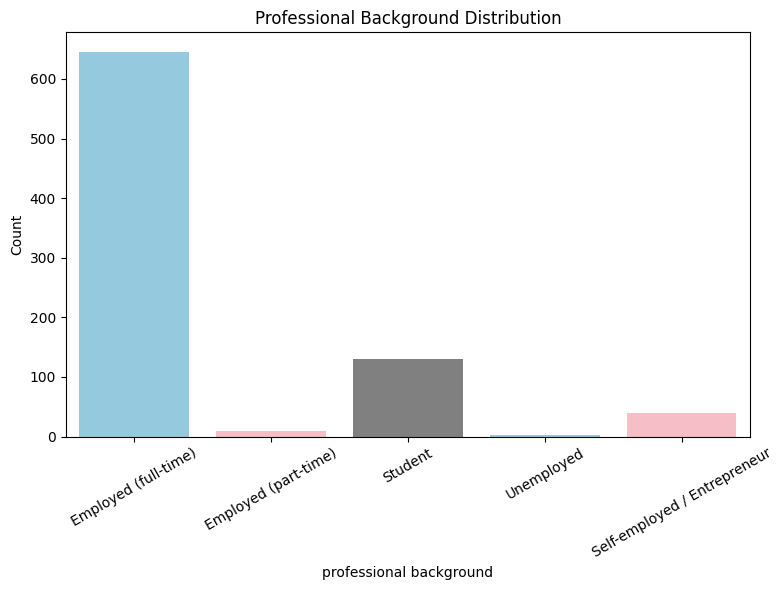

In [21]:
profession_map = {0: 'Employed (full-time)', 1: 'Employed (part-time)', 2: 'Student', 3: 'Unemployed', 4: 'Self-employed / Entrepreneur'}
df_copy2['profession_label'] = df_copy2['professional background'].map(profession_map)

# Countplot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy2, x='profession_label', palette=['skyblue', 'lightpink', 'gray'])
plt.title('Professional Background Distribution')
plt.xlabel('professional background')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings
from scipy.stats import chi2_contingency
import numpy as np

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/profession/association/plots-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

binary_contingency_tables = []

for feature in binary_features:
    try:
        contingency_table = pd.crosstab(df_copy2['professional background'], df_copy2[feature])

        if (contingency_table == 0).any().any():
            print(f"Skipping chi-squared test for {feature}: Contingency table has empty categories.")
            chi2, p, cramers_v = None, None, None
        else:
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if (expected < 1).any():
                print(f"Skipping chi-squared test for {feature}: Expected frequencies contain values less than 1.")
                chi2, p, cramers_v = None, None, None
            else:
                n = contingency_table.sum().sum()
                cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

                print(f"Feature: {feature}")
                print(f"Chi-Squared Statistic: {chi2:.3f}")
                print(f"P-Value: {p:.3f}")
                print(f"Cramér's V: {cramers_v:.3f}")
                if p < 0.05:
                    print("Result: There is a significant association between professional background and this feature (p < 0.05).")
                else:
                    print("Result: There is no significant association between professional background and this feature (p >= 0.05).")

        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature
        contingency_table_reset['Chi2'] = chi2 if chi2 is not None else 'N/A'
        contingency_table_reset['P-Value'] = p if p is not None else 'N/A'
        contingency_table_reset["Cramér's V"] = cramers_v if cramers_v is not None else 'N/A'
        binary_contingency_tables.append(contingency_table_reset)

    except Exception as e:
        print(f"Failed to process {feature}: {e}")
        continue

if binary_contingency_tables:
    all_binary_tables_df = pd.concat(binary_contingency_tables, ignore_index=True)
    cols = ['Feature', 'Chi2', 'P-Value', "Cramér's V"] + [col for col in all_binary_tables_df.columns if col not in ['Feature', 'Chi2', 'P-Value', "Cramér's V"]]
    all_binary_tables_df = all_binary_tables_df[cols]
    output_xlsx = '/kaggle/working/profession/association/binary_features_contingency_tables.xlsx'
    all_binary_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved binary features contingency tables to: {output_xlsx}")
else:
    print("No binary features contingency tables to save.")

zip_filename = '/kaggle/working/profession/association/plots-association.zip'
print(f"Updating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file updated: {zip_filename}")

print("Chi-Squared Test for Professional Background vs. Binary Features completed.")

Skipping chi-squared test for have used online shopping platforms before: Contingency table has empty categories.
Skipping chi-squared test for have you made online purchases during crisis time?: Expected frequencies contain values less than 1.
Skipping chi-squared test for ali-express: Contingency table has empty categories.
Skipping chi-squared test for daraz: Contingency table has empty categories.
Skipping chi-squared test for ebay: Contingency table has empty categories.
Skipping chi-squared test for ikman: Contingency table has empty categories.
Skipping chi-squared test for instagram stores: Contingency table has empty categories.
Skipping chi-squared test for kapruka: Expected frequencies contain values less than 1.
Skipping chi-squared test for keels: Contingency table has empty categories.
Skipping chi-squared test for lassana.com: Contingency table has empty categories.
Skipping chi-squared test for pickme: Contingency table has empty categories.
Skipping chi-squared test fo

The primary reason chi-squared tests were skipped for these features is the small sample size of certain professional background categories, specifically:

 - Employed (part-time): Only 10 respondents.
 - Unemployed: Only 3 respondents.
 
These small row totals lead to very low expected frequencies (often < 1) in some cells, especially when paired with columns that have imbalanced totals (e.g., column 0 for have you made online purchases during crisis time? has only 27 respondents, while column 1 has 801). The chi-squared test cannot be reliably performed when expected frequencies fall below 1.

Creating bar plots for the binary_features since most of them were skipped.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings

warnings.filterwarnings('ignore')

# Define output directory for plots
output_dir = '/kaggle/working/profession/association/plots_binary-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# Define selected binary features
# selected_features = [
#     'have you made online purchases during crisis time?', 'kapruka', 'patpat.lk',
#     'riyasewana.lk', 'onlinepharmacy.lk', 'odel.lk', 'keellssuper.lk', 'ubereats.com'
# ]

# Map professional background to meaningful labels
prof_background_mapping = {
    0: 'Employed (full-time)',
    1: 'Employed (part-time)',
    2: 'Students',
    3: 'Unemployed',
    4: 'Self-employed / Entrepreneur'
}
df_copy2['professional_background_str'] = df_copy2['professional background'].map(prof_background_mapping)

# Association: Professional Background vs. Selected Binary Features (Bar Plots)
for feature in binary_features:
    try:
        # Create contingency table for verification
        contingency_table = pd.crosstab(df_copy2['professional_background_str'], df_copy2[feature])

        # Visualize using stacked bar plot
        plt.figure(figsize=(8, 6))
        sns.countplot(
            data=df_copy2, 
            x='professional_background_str', 
            hue=feature, 
            palette='Set2',
            order=['Professionals', 'Self-Employed', 'Students', 'Unemployed', 'Retired']
        )
        plt.title(f'Professional Background vs. {feature}')
        plt.xlabel('Professional Background')
        plt.ylabel('Count')
        plt.legend(title='Usage', labels=['No', 'Yes'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        filename = f"{output_dir}/professional_background_vs_{sanitize_filename(feature)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")

    except Exception as e:
        print(f"Failed to process {feature}: {e}")
        plt.close()
        continue

# Update the ZIP file to include all plots
zip_filename = '/kaggle/working/profession/association/plots_binary-association.zip'
print(f"Updating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file updated: {zip_filename}")

print("Bar Plots for Professional Background vs. Binary Features completed.")

Saved plot: /kaggle/working/profession/association/plots_binary-association/professional_background_vs_have_used_online_shopping_platforms_before_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots_binary-association/professional_background_vs_have_you_made_online_purchases_during_crisis_time__stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots_binary-association/professional_background_vs_ali-express_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots_binary-association/professional_background_vs_daraz_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots_binary-association/professional_background_vs_ebay_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots_binary-association/professional_background_vs_ikman_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots_binary-association/professional_background_vs_instagram_stores_stacked_bar.png
Saved plot: /kaggle/working

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings
from scipy.stats import chi2_contingency
import numpy as np

warnings.filterwarnings('ignore')

# Define output directory for plots
output_dir = '/kaggle/working/profession/association/plots_grouped_platforms-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

# Map professional background to meaningful labels
prof_background_mapping = {
    0: 'Employed (full-time)',
    1: 'Employed (part-time)',
    2: 'Student',
    3: 'Unemployed',
    4: 'Self-employed / Entrepreneur'
}
df_copy2['professional_background_str'] = df_copy2['professional background'].map(prof_background_mapping)

# # Combine Employed (part-time) and Unemployed into "Other"
# df_copy2['professional_background_adj'] = df_copy2['professional_background_str'].replace(
#     {'Employed (part-time)': 'Other', 'Unemployed': 'Other'}
# )

professional_background_order = ['Employed (full-time)', 'Employed (part-time)', 'Student', 'Unemployed', 'Self-employed / Entrepreneur']

# Define platform groups, not used, and unknown values
platform_groups = [
    'general e-commerce platforms', 'specialty online stores / automobile', 'online pharmacies', 
    'fashion and beauty retailers', 'grocery delivery services'
]

not_used_values = {
    'general e-commerce platforms': None,
    'specialty online stores / automobile': 'zero specialty online stores / automobile',
    'online pharmacies': 'no online pharmacies',
    'fashion and beauty retailers': 'no fashion and beauty retailers',
    'grocery delivery services': 'grocery delivery services not used'
}

unknown_values = {
    'general e-commerce platforms': None,
    'specialty online stores / automobile': 'specialty online stores / automobile unknown',
    'online pharmacies': 'online pharmacy unknown',
    'fashion and beauty retailers': 'unknown fashion and beauty retailers',
    'grocery delivery services': 'unknown grocery delivery services'
}

# Categorize platform usage into 'used', 'not used', 'unknown'
for group in platform_groups:
    df_copy2[f'{group}_status'] = df_copy2[group].apply(
        lambda x: 'unknown' if pd.isna(x) or (group in unknown_values and x == unknown_values[group])
        else 'not used' if group in not_used_values and x == not_used_values[group]
        else 'used'
    )

    # Also create a binary usage column (0: Not Used, 1: Used) for chi-squared tests, excluding 'unknown'
    df_copy2[f'{group}_binary_usage'] = df_copy2[group].apply(
        lambda x: np.nan if pd.isna(x) or (group in unknown_values and x == unknown_values[group])
        else 0 if group in not_used_values and x == not_used_values[group]
        else 1
    )

platform_group_status = [f'{group}_status' for group in platform_groups]
status_order = ['used', 'not used', 'unknown']

# Print mappings for verification
print("Mappings for 'not used' and 'unknown' values in platform_groups:")
for group in platform_groups:
    print(f"\nPlatform Group: {group}")
    print(f"Not Used Value: {not_used_values[group]}")
    print(f"Unknown Value: {unknown_values[group]}")

# Association: Professional Background (Adjusted) vs. Grouped Platforms (Chi-Squared + Stacked Bar Plots)
platform_groups_contingency_tables = []

for group in platform_groups:
    group_status = f'{group}_status'
    group_binary = f'{group}_binary_usage'
    try:
        # Create binary contingency table (excluding 'unknown') for chi-squared test
        df_binary = df_copy2.dropna(subset=[group_binary])
        contingency_table_binary = pd.crosstab(df_binary['professional_background_adj'], df_binary[group_binary])
        contingency_table_binary = contingency_table_binary.reindex(index=professional_background_order, columns=[0, 1], fill_value=0)

        # Perform chi-squared test
        if (contingency_table_binary == 0).any().any():
            print(f"\nSkipping chi-squared test for {group}: Contingency table has empty categories.")
            chi2, p, cramers_v = None, None, None
        else:
            chi2, p, dof, expected = chi2_contingency(contingency_table_binary)
            if (expected < 1).any():
                print(f"Skipping chi-squared test for {group}: Expected frequencies contain values less than 1.")
                chi2, p, cramers_v = None, None, None
            else:
                n = contingency_table_binary.sum().sum()
                cramers_v = np.sqrt(chi2 / (n * (min(contingency_table_binary.shape) - 1)))
                print(f"\nPlatform Group: {group}")
                print(f"Chi-Squared Statistic: {chi2:.3f}")
                print(f"P-Value: {p:.3f}")
                print(f"Cramér's V: {cramers_v:.3f}")
                if p < 0.05:
                    print("Result: There is a significant association between professional background and this platform group (p < 0.05).")
                else:
                    print("Result: There is no significant association between professional background and this platform group (p >= 0.05).")

        # Create contingency table for visualization (including 'unknown')
        contingency_table = pd.crosstab(df_copy2['professional_background_adj'], df_copy2[group_status])
        contingency_table = contingency_table.reindex(index=professional_background_order, columns=status_order, fill_value=0)

        # Store contingency table with test results
        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Platform Group'] = group
        contingency_table_reset['Chi2'] = chi2 if chi2 is not None else 'N/A'
        contingency_table_reset['P-Value'] = p if p is not None else 'N/A'
        contingency_table_reset["Cramér's V"] = cramers_v if cramers_v is not None else 'N/A'
        platform_groups_contingency_tables.append(contingency_table_reset)

        # Visualize using stacked bar plot (with 'used', 'not used', 'unknown')
        plt.figure(figsize=(8, 6))
        sns.countplot(
            data=df_copy2, 
            x='professional_background_adj', 
            hue=group_status, 
            hue_order=status_order, 
            palette='Set2', 
            order=professional_background_order
        )
        plt.title(f'Professional Background vs. {group} Usage')
        plt.xlabel('Professional Background')
        plt.ylabel('Count')
        plt.legend(title='Usage Status', labels=['Used', 'Not Used', 'Unknown'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        filename = f"{output_dir}/professional_background_adj_vs_{sanitize_filename(group)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")

    except Exception as e:
        print(f"Failed to process {group}: {e}")
        plt.close()
        continue

# Save contingency tables to Excel
if platform_groups_contingency_tables:
    all_platform_tables_df = pd.concat(platform_groups_contingency_tables, ignore_index=True)
    cols = ['Platform Group', 'Chi2', 'P-Value', "Cramér's V"] + [col for col in all_platform_tables_df.columns if col not in ['Platform Group', 'Chi2', 'P-Value', "Cramér's V"]]
    all_platform_tables_df = all_platform_tables_df[cols]
    output_xlsx = '/kaggle/working/profession/association/platform_groups_contingency_tables.xlsx'
    all_platform_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved platform groups contingency tables to: {output_xlsx}")
else:
    print("No platform groups contingency tables to save.")

# Create a ZIP file for plots
zip_filename = '/kaggle/working/profession/association/plots_grouped_platforms-association.zip'
print(f"Updating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file updated: {zip_filename}")

print("Chi-Squared Test and Bar Plots for Professional Background (Adjusted) vs. Grouped Platforms completed.")

Mappings for 'not used' and 'unknown' values in platform_groups:

Platform Group: general e-commerce platforms
Not Used Value: None
Unknown Value: None

Platform Group: specialty online stores / automobile
Not Used Value: zero specialty online stores / automobile
Unknown Value: specialty online stores / automobile unknown

Platform Group: online pharmacies
Not Used Value: no online pharmacies
Unknown Value: online pharmacy unknown

Platform Group: fashion and beauty retailers
Not Used Value: no fashion and beauty retailers
Unknown Value: unknown fashion and beauty retailers

Platform Group: grocery delivery services
Not Used Value: grocery delivery services not used
Unknown Value: unknown grocery delivery services

Skipping chi-squared test for general e-commerce platforms: Contingency table has empty categories.
Saved plot: /kaggle/working/profession/association/plots_grouped_platforms-association/professional_background_adj_vs_general_e-commerce_platforms_stacked_bar.png

Skipping ch

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import zipfile
import warnings

warnings.filterwarnings('ignore')

output_dir = '/kaggle/working/profession/association/plots-other_features-association'
os.makedirs(output_dir, exist_ok=True)

def sanitize_filename(name):
    return re.sub(r'[^\w\s.-]', '_', name.replace('/', '_').replace('.', '_')).replace(' ', '_')

prof_background_mapping = {
    0: 'Employed (full-time)',
    1: 'Employed (part-time)',
    2: 'Student',
    3: 'Unemployed',
    4: 'Self-employed / Entrepreneur'
}

df_copy2['profession_str'] = df_copy2['professional background'].map(prof_background_mapping)

professional_background_order = ['Employed (full-time)', 'Employed (part-time)', 'Student', 'Unemployed', 'Self-employed / Entrepreneur']

agreement_mapping = {
    0: 'Strongly Disagree',
    1: 'Disagree',
    2: 'Neutral',
    3: 'Agree',
    4: 'Strongly Agree'
}

# Define order for agreement levels
agreement_order = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

for feature in other_features:
    df_copy2[f'{feature}_str'] = df_copy2[feature].map(agreement_mapping)

other_features_str = [f'{feature}_str' for feature in other_features]

other_features_contingency_tables = []

for feature_str in other_features_str:
    try:
        contingency_table = pd.crosstab(df_copy2['profession_str'], df_copy2[feature_str])
        
        contingency_table = contingency_table.reindex(professional_background_order)
        contingency_table = contingency_table.reindex(columns=agreement_order, fill_value=0)

        # Store contingency table
        contingency_table_reset = contingency_table.reset_index()
        contingency_table_reset['Feature'] = feature_str.replace('_str', '')  
        other_features_contingency_tables.append(contingency_table_reset)

        plt.figure(figsize=(8, 6))
        sns.countplot(
            data=df_copy2, 
            x='profession_str', 
            hue=feature_str, 
            hue_order=agreement_order, 
            palette='Set2', 
            order=professional_background_order
        )
        plt.title(f'Professional Background vs. {feature_str.replace("_str", "")}')
        plt.xlabel('Marital Status')
        plt.ylabel('Count')
        plt.legend(title='Agreement Level')
        plt.xticks(rotation=30)
        plt.tight_layout()
        filename = f"{output_dir}/professional_background_vs_{sanitize_filename(feature_str)}_stacked_bar.png"
        plt.savefig(filename)
        plt.close()
        print(f"Saved plot: {filename}")
    except Exception as e:
        print(f"Failed to process {feature_str}: {e}")
        plt.close()
        continue

if other_features_contingency_tables:
    all_other_features_tables_df = pd.concat(other_features_contingency_tables, ignore_index=True)
    
    cols = ['Feature', 'profession_str'] + agreement_order
    all_other_features_tables_df = all_other_features_tables_df[cols]
    output_xlsx = '/kaggle/working/profession/association/other_features_contingency_tables.xlsx'
    all_other_features_tables_df.to_excel(output_xlsx, index=False)
    print(f"Saved other features contingency tables to: {output_xlsx}")
else:
    print("No other features contingency tables to save.")

zip_filename = '/kaggle/working/profession/association/plots-other_features-association.zip'
print(f"Updating ZIP file: {zip_filename}...")

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            if file.endswith('.png'):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, '/kaggle/working/')
                zipf.write(file_path, arcname)

print(f"ZIP file updated: {zip_filename}")

print("Association Analysis for professional_background vs. Other Features completed. Plots saved as PNG files")

Saved plot: /kaggle/working/profession/association/plots-other_features-association/professional_background_vs_it_is_easy_to_navigate_through_the_online_platform_to_find_the_products_or_services_i_need_str_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots-other_features-association/professional_background_vs_the_online_platform_provides_clear_and_intuitive_navigation_options_str_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots-other_features-association/professional_background_vs_it_was_easy_for_me_to_learn_how_to_use_the_online_platform_for_making_online_purchases_str_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots-other_features-association/professional_background_vs_i_quickly_became_proficient_in_using_the_online_platform_for_making_online_purchases_during_a_crisis_str_stacked_bar.png
Saved plot: /kaggle/working/profession/association/plots-other_features-association/professional_background_vs_the_instructions_p